In [2]:
import numpy as np
import pandas as pd

#컬럼명이 없을 때 불러오는 방법
yob1880 = pd.read_csv("../babynames/yob1880.txt", names= ['name','sex','birth'])
yob1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
#성별로 그룹화한 다음, 각 그룹에 대해 birth의 합계

yob1880.groupby("sex")["birth"].sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [142]:
# for year in range(1880,2011):
#     print("../babynames/yob"+str(year)+".txt")
#     print("../babynames/yob%d.txt" %year)

columns = ['name','sex','births']
pieces = []

for year in range(1880,2011):
    frame = pd.read_csv("../babynames/yob%d.txt" % year , names=columns)
    pieces.append(frame)

    frame['year'] = year

print(len(pieces))

names = pd.concat(pieces, ignore_index=True)
names

131


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [25]:
# names.pivot_table('births', index = 'year', columns='sex', aggfunc=sum).reset_index()
totalBirths = names.pivot_table('births', index = 'year', columns='sex', aggfunc=sum)

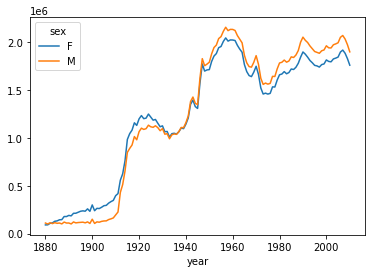

In [27]:
totalBirths.plot()

In [60]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [67]:
#이름이 전체 출생수에서 차지하는 비율을 names에 추가
#names['prop'] = 구현

prop = names.groupby(['year','sex','name'])['births'].sum() / names.groupby(['year','sex'])['births'].sum()
prop.reset_index()
prop.rename({'birth':'props'})
prop

year  sex  name     
1880  F    Abbie        0.000780
           Abby         0.000066
           Abigail      0.000132
           Ada          0.007165
           Adah         0.000264
                          ...   
2010  M    Zyrion       0.000007
           Zyron        0.000004
           Zyshawn      0.000005
           Zytavious    0.000003
           Zzyzx        0.000003
Name: births, Length: 1690784, dtype: float64

In [65]:
#names.groupby(['year','sex'])['prop'] = prop
names['prop'] = prop

TypeError: incompatible index of inserted column with frame index

In [56]:
def addProp(group): #그룹화된 객체가 전달됨
    group['prop'] = group.births/group.births.sum()
    return group

names2 = names.groupby(['year','sex']).apply(addProp)
names2

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [69]:
# names에서 year와 sex를 기준으로 그룹화를 한 다음 prop컬럼 값에 대한 합계를 출력 = 1이 나온다
names2.groupby(['year','sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [70]:
names2.groupby(['year','sex'])['prop'].max()

year  sex
1880  F      0.077643
      M      0.087381
1881  F      0.075243
      M      0.087039
1882  F      0.075558
               ...   
2008  M      0.011075
2009  F      0.012159
      M      0.010660
2010  F      0.012923
      M      0.011523
Name: prop, Length: 262, dtype: float64

In [99]:
# def getTop1000(group): #그룹단위로 getTop1000 함수가 적용된다
#     return group.sort_values('births') #오름차순 sort

def getTop1000(group): #그룹단위로 getTop1000 함수가 적용된다
    return group.sort_values('births', ascending = False)[:1000] #내림차순 sort #1000건씩 출력

top1000 = names2.groupby(['year','sex']).apply(getTop1000)

In [100]:
top1000.reset_index(drop=True, inplace=True) # inplace=True : 내부적으로 인덱스를 반영하라는 뜻

In [101]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [102]:
boys = top1000[top1000['sex']=='M']
girls = top1000[top1000['sex']=='F']

In [116]:
girls.sort_values('prop',ascending=False)[:200].tail(50)

,name,sex,births,year,prop
79879,Helen,F,35093,1920,0.029288
129879,Barbara,F,38283,1945,0.029284
109879,Barbara,F,30686,1935,0.029273
95879,Dorothy,F,33726,1928,0.029255
123879,Patricia,F,39454,1942,0.029214
3878,Anna,F,3143,1882,0.029142
165877,Lisa,F,56030,1963,0.029075
211878,Ashley,F,49672,1986,0.028979
13878,Anna,F,4227,1887,0.028955
215877,Jessica,F,51514,1988,0.028955


In [104]:
totalBirths = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [105]:
totalBirths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


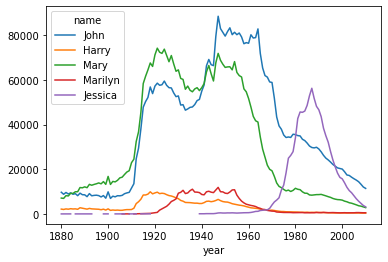

In [113]:
subset = totalBirths[['John','Harry','Mary','Marilyn','Jessica']]
subset.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4A3772448>,
      dtype=object)

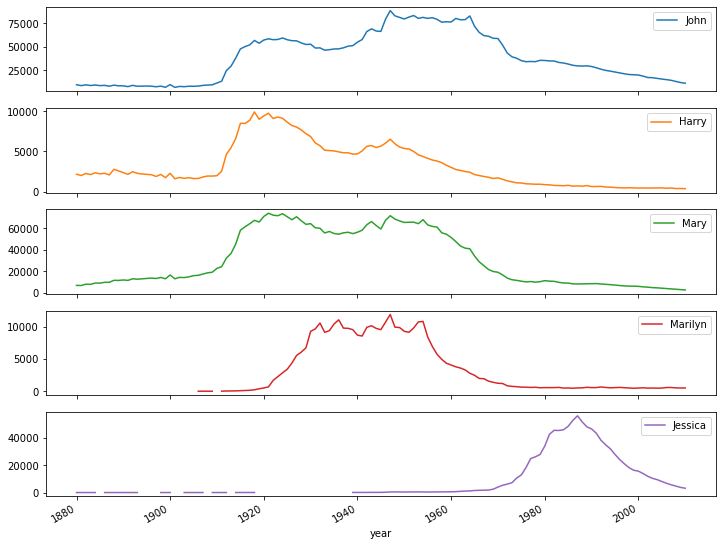

In [115]:
subset.plot(subplots=True, figsize=(12,10))

In [175]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


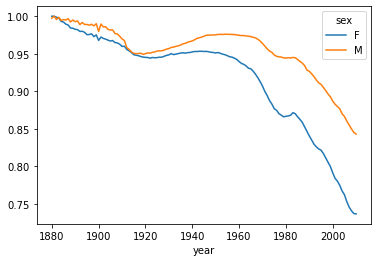

In [120]:
table.plot()

In [128]:
df = boys[boys.year==2010]
propCumsum = df.sort_values('prop',ascending=False).prop.cumsum()

In [130]:
propCumsum.searchsorted(0.5)
#116:인덱스 0번부터 116번까지에 대한 누적합이 0.5를 초과.

116

In [134]:
propCumsum.iloc[116]
#상위117명의 아이들 이름이 전체에서 50%넘게 차지

0.5006516075268308

In [140]:
df = boys[boys.year==1900]
in1900 = df.sort_values('prop',ascending=False).prop.cumsum()
in1900.searchsorted(0.5)+1
#상위25명의 아이들 이름이 전체에서 50% 차지 : 1900년도에는 이름이 다양하지 않았다

25

In [165]:
# 이름의 마지막 글자 따와서 분포를 조사하기
# str사용
names.name.str[-1]

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

In [ ]:
#멍청한 내 방법
# for i in names.index:
#     print(names['name'][i][-1:])

In [171]:
# names.name.map(함수명)
# def getLastLetter(x):
#     return x[-1]
getLastLetter = lambda x: x[-1]
lastLetters = names.name.map(getLastLetter)
lastLetters.name = 'lastLetters'
#연도별/성별 이름마지막글자별 아기수
table = names.pivot_table('births', index = lastLetters ,columns=['sex','year'], aggfunc = sum)
#연도별 이름마지막글자별 아기수
names.pivot_table('births', index = lastLetters ,columns=['sex'], aggfunc = sum)

sex,F,M
lastLetters,,
a,54115030,1761364
b,14130,1242256
c,22724,1531156
d,736531,16146003
e,35462607,13947895
f,1455,193774
g,32653,574013
h,7378398,6323495
i,3522803,615823


In [172]:
subtable = table.reindex(columns=[1910,1960,2010], level = 'year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
lastLetters                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [174]:
letterProp = subtable/subtable.sum()
letterProp

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
lastLetters                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831